<img src="graphics/graphiti.jpeg" width=300 align="right">
<img src="graphics/graphiti_2.jpeg" width=300 align="right">  

# Lab 2. The line of best fit.
How it Thursday, again?! I guess we can do a #TBT. Did you ever plot some illustrations doing Graphiti in elementary school? When's the last time you had to make a scatterplot? Was it after a science lab? Was it for fun (like me?) Was it by hand? Let's learn how to do it in R on the computer.


## Recap
What did we do last time?

1. Load in our data
2. Learned `ggplot2` and `dplyr` syntax
3. Explored `dplyr` summary statistics and column manipulation
4. Made histograms and barplots using `geom_histogram()` and `geom_bar()`


## Goals
This lab will get you drawing dots and lines in R. (We won't be plotting TV's like on the right, but we'll be plotting cool numbers indeed!)

1. Libraries first, otherwise errors come next
2. Load **and look at** in our data  
    a. Check out the spreadsheet format  
    b. Check out how our data looks visually
3. Create a linear regression model
4. Interpret our results

In [3]:
library(dplyr)
library(ggplot2)
library(broom)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
CS_data <- read.csv("rstudio-export/Data/Cesarean.csv")
CS_data$Income_Group <- forcats::fct_relevel(CS_data$Income_Group, 
                                            "Low income", "Lower middle income", 
                                            "Upper middle income", "High income: nonOECD", 
                                            "High income: OECD")
head(CS_data)

Country_Name,CountryCode,Births_Per_1000,Income_Group,Region,GDP_2006,CS_rate
Albania,ALB,46,Upper middle income,Europe & Central Asia,3051.768,0.256
Andorra,AND,1,High income: nonOECD,Europe & Central Asia,42417.229,0.237
United Arab Emirates,ARE,63,High income: nonOECD,Middle East & North Africa,42950.101,0.100
Argentina,ARG,689,High income: nonOECD,Latin America & Caribbean,6649.414,0.352
Armenia,ARM,47,Lower middle income,Europe & Central Asia,2126.619,0.141
Australia,AUS,267,High income: OECD,East Asia & Pacific,36100.559,0.303


In [5]:
CS_data <- CS_data %>% mutate(CS_rate_100 = CS_rate*100)
head(CS_data)

Country_Name,CountryCode,Births_Per_1000,Income_Group,Region,GDP_2006,CS_rate,CS_rate_100
Albania,ALB,46,Upper middle income,Europe & Central Asia,3051.768,0.256,25.6
Andorra,AND,1,High income: nonOECD,Europe & Central Asia,42417.229,0.237,23.7
United Arab Emirates,ARE,63,High income: nonOECD,Middle East & North Africa,42950.101,0.100,10.0
Argentina,ARG,689,High income: nonOECD,Latin America & Caribbean,6649.414,0.352,35.2
Armenia,ARM,47,Lower middle income,Europe & Central Asia,2126.619,0.141,14.1
Australia,AUS,267,High income: OECD,East Asia & Pacific,36100.559,0.303,30.3


**1. Make a scatter plot between `CS_rate_100` and `GDP_2006`:**

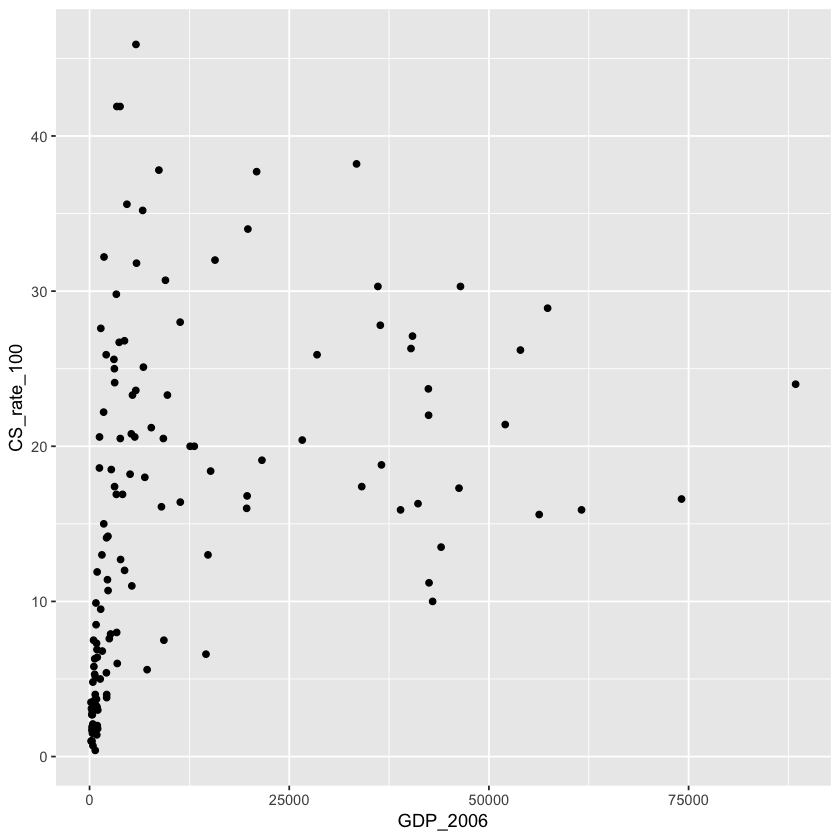

In [6]:
ggplot(CS_data, aes(x=GDP_2006, y=CS_rate_100)) + geom_point()

**2. Using the `mutate()` function, add two new logged variables to the data set
`CS_data`. Call the variables `log_CS` and `log_GDP`. Use base e, also know as 
natural logarithms, to create the logged variables:**

In [7]:
CS_data <- CS_data %>% mutate(log_CS=log(CS_rate_100),
                   log_GDP=log(GDP_2006))
names(CS_data)

[1] "Country_Name"    "CountryCode"     "Births_Per_1000" "Income_Group"   
 [5] "Region"          "GDP_2006"        "CS_rate"         "CS_rate_100"    
 [9] "log_CS"          "log_GDP"

**3. Remake the scatter plot using the logged variables**:

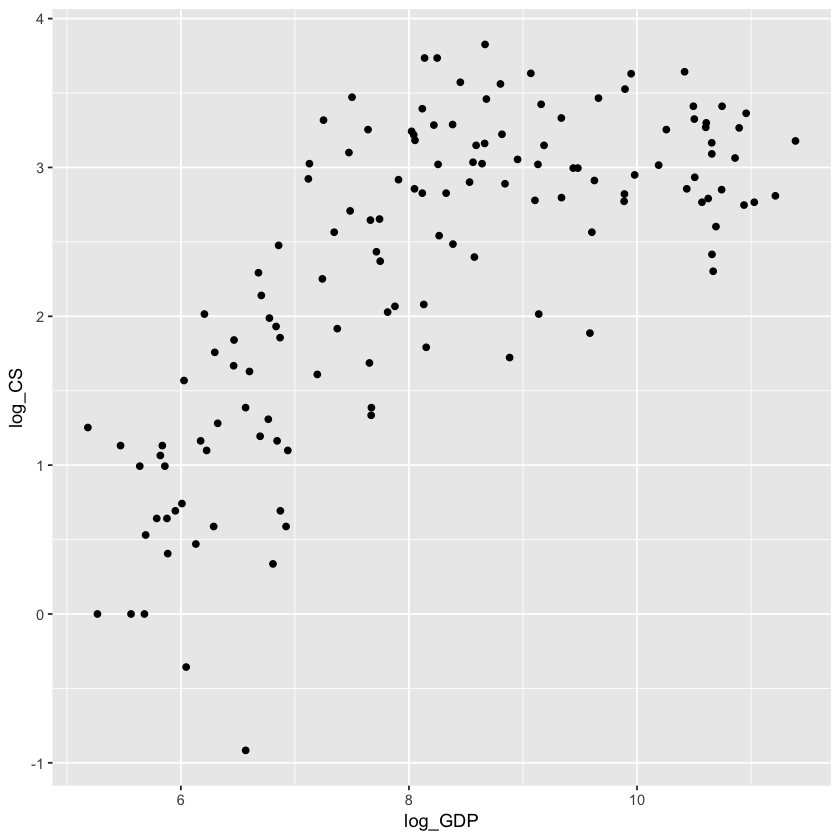

In [8]:
ggplot(CS_data, aes(x=log_GDP, y=log_CS)) +
    geom_point()

**4. A `geom` that you have not yet learnt is `geom_smooth()`. This geom can fit 
a curve to the data. Extend you `ggplot()` code by adding geom_smooth() to it:**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


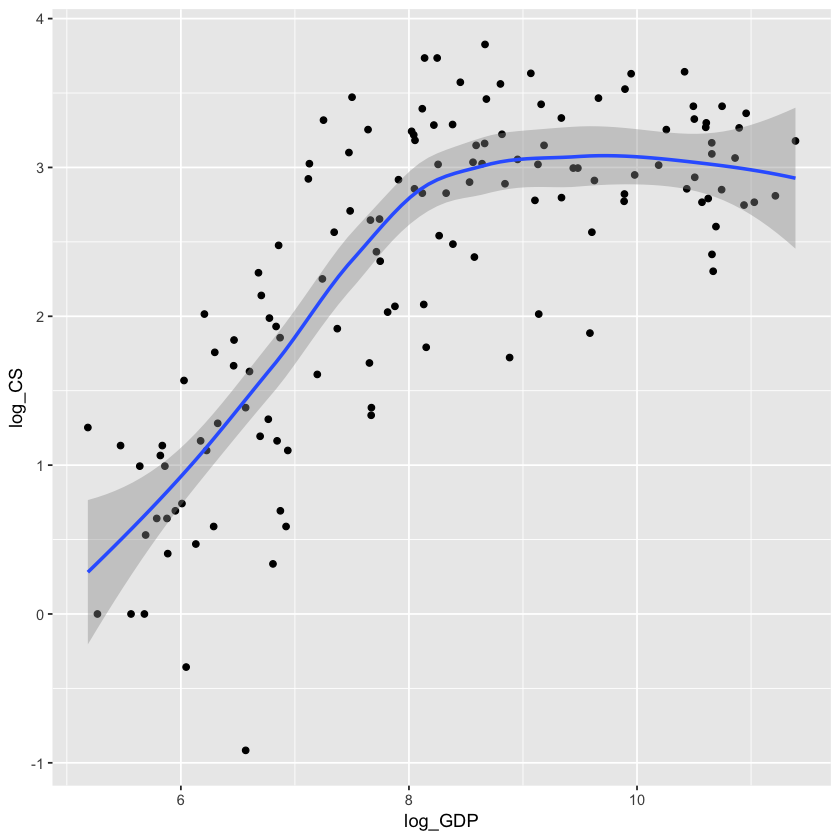

In [9]:
ggplot(CS_data, aes(x=log_GDP, y=log_CS)) + geom_point() + geom_smooth()

**5. Does the relationship between logged GDP and logged CS look linear?**

**6. Modify your scatter plot by linking the color of the points to the variable
`Income_Group`.**

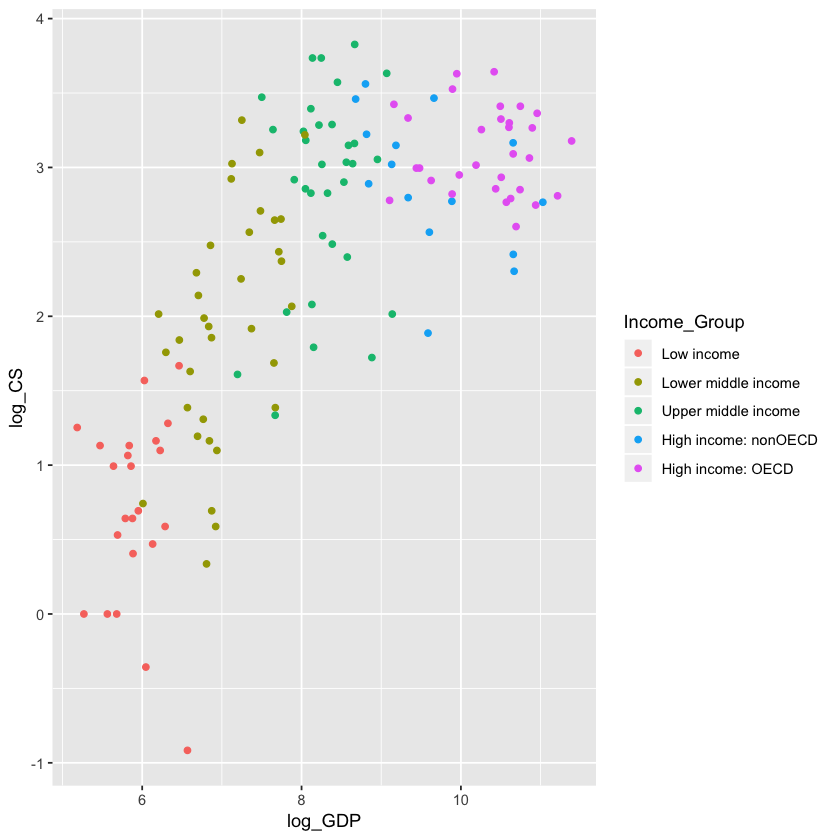

In [13]:
ggplot(CS_data, aes(x=log_GDP, y=log_CS)) +
    geom_point(aes(color=Income_Group))

**7. For this lab, we would like to use linear regression. To do this, use a 
`dplyr` function to make a new data set called `CS_data_sub` that only contains
the low-, lower-middle, and upper-middle income countries (hint: You might want
to look at the data to see exactly what these levels are called in the data set):**

In [16]:
CS_data_sub <- CS_data %>%
    filter(Income_Group %in% c("Low Income", "Lower middle income", "Upper middle income"))

In [14]:
head(CS_data)

Country_Name,CountryCode,Births_Per_1000,Income_Group,Region,GDP_2006,CS_rate,CS_rate_100,log_CS,log_GDP
Albania,ALB,46,Upper middle income,Europe & Central Asia,3051.768,0.256,25.6,3.242592,8.023476
Andorra,AND,1,High income: nonOECD,Europe & Central Asia,42417.229,0.237,23.7,3.165475,10.655310
United Arab Emirates,ARE,63,High income: nonOECD,Middle East & North Africa,42950.101,0.100,10.0,2.302585,10.667794
Argentina,ARG,689,High income: nonOECD,Latin America & Caribbean,6649.414,0.352,35.2,3.561046,8.802284
Armenia,ARM,47,Lower middle income,Europe & Central Asia,2126.619,0.141,14.1,2.646175,7.662289
Australia,AUS,267,High income: OECD,East Asia & Pacific,36100.559,0.303,30.3,3.411148,10.494064


In [15]:
dim(CS_data)

[1] 137  10

In [17]:
dim(CS_data_sub)

[1] 68 10

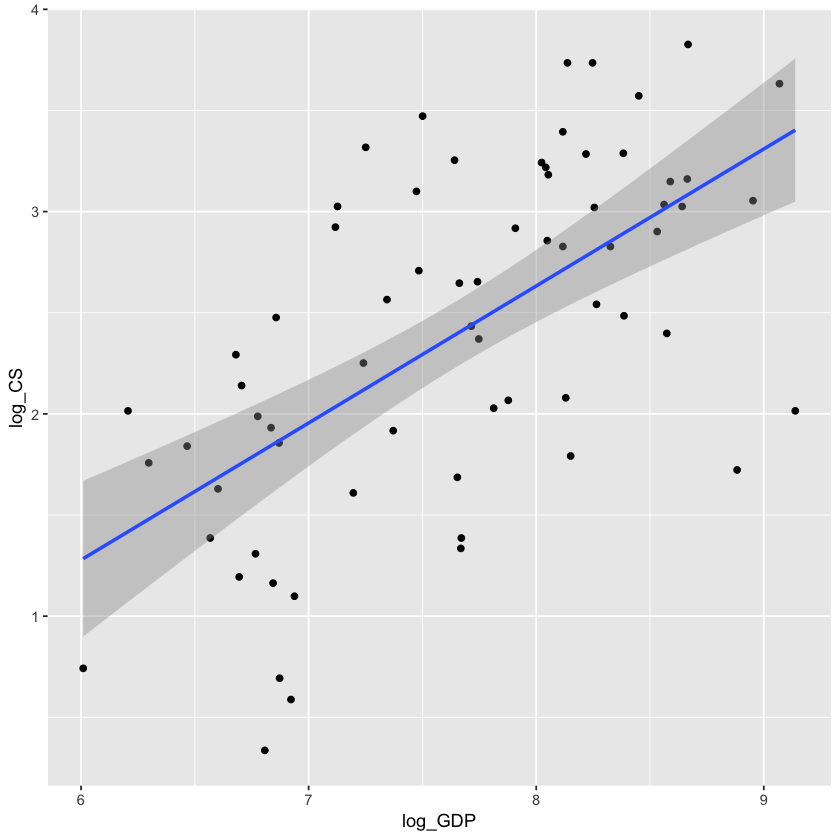

In [25]:
ggplot(CS_data_sub, aes(x=log_GDP, y=log_CS)) + geom_point() + geom_smooth(method="lm")

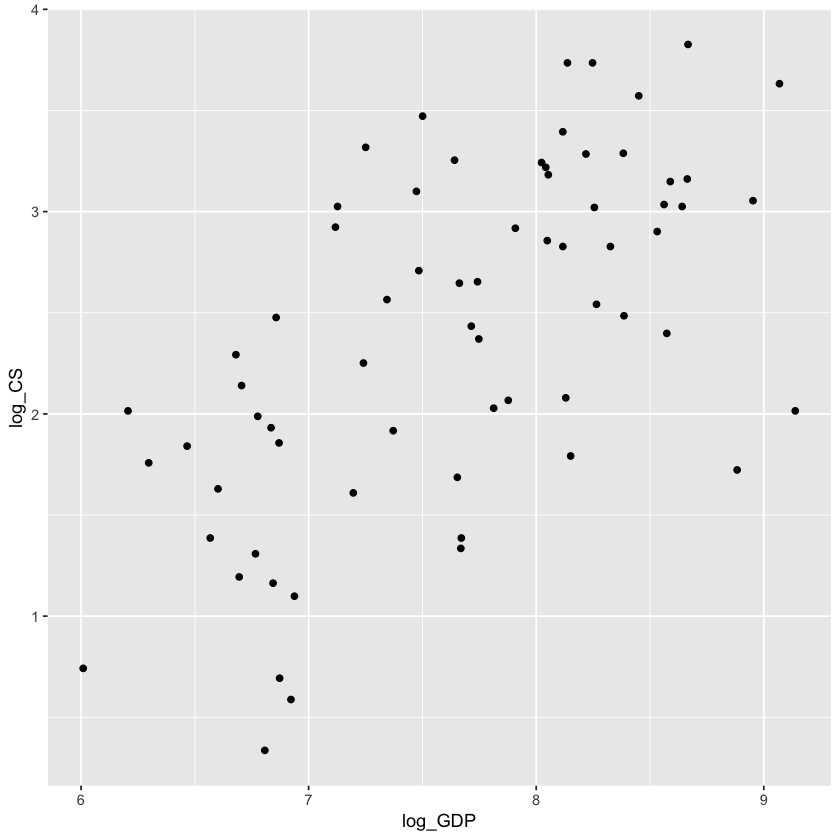

In [26]:
ggplot(CS_data_sub, aes(x=log_GDP, y=log_CS)) + geom_point() + geom_abline(slope=0.56, intercept =6)

**9. Given that the relationship is approximately linear, use linear regression to 
model the relationship between `log_CS` as the response variable and `log_GDP` 
as the explanatory variable. Don't forget to specify the correct data set!:**

In [19]:
# lm(y_variable ~ x_variable, data=whatever_your_dataframe_is)
mod1 <- lm(log_GDP ~ log_CS, data=CS_data_sub)

**Interpretation of the intercept** If (x-variable) log GDP were to be 0, then the (y-variable) log CS rate would be 6.3025.

**Interpretation of the slope** If we increase (x-variable) by one unit of log GDP, then the (y-variable) log CS rate would increase by 0.56 log GDP units.

In [21]:
tidy(mod1)

term,estimate,std.error,statistic,p.value
(Intercept),6.3025861,0.22449118,28.074983,2.045773e-38
log_CS,0.5638647,0.08830345,6.385534,1.973369e-08


In [22]:
glance(mod1)

,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
value,0.381878,0.3725125,0.6134315,40.77504,1.973369e-08,2,-62.24213,130.4843,137.1428,24.83568,66


**10. Interpret the intercept estimate:**

<Replace this text with your answer.>

**11. Estimate what the cesarean delivery rate would be for a country with a GDP 
of 2000. Outline the steps you take to calculate your answer and provide an 
interpretation. Round your final answer to one decimal place.**

<Replace this text with your answer.>

**12. Is it appropriate to use the model to predict the cesarean delivery rate 
for a country with a GDP of 50,000? Why or why not? Based on the relationship in 
the full data set, would you expect the linear model to over or under predict?**

<Replace this text with your answer.>